In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import tensorflow as tf
from src.utils import GAESMLP, splitDataset, scatter_data


### Data loading & splitting

In [3]:
classes = pd.read_csv("data/classes.csv", header=None)
moons = pd.read_csv("data/moons.csv", header=None)
circles = pd.read_csv("data/circles.csv", header=None)

In [4]:
df_classes = splitDataset(classes.iloc[:,:-1].values, classes.iloc[:,-1].values[...,np.newaxis], [0.7,0.15,0.15])
df_moons = splitDataset(moons.iloc[:,:-1].values, moons.iloc[:,-1].values[...,np.newaxis], [0.7,0.15,0.15])
df_circles = splitDataset(circles.iloc[:,:-1].values, circles.iloc[:,-1].values[...,np.newaxis], [0.7,0.15,0.15])

### Data Visualization

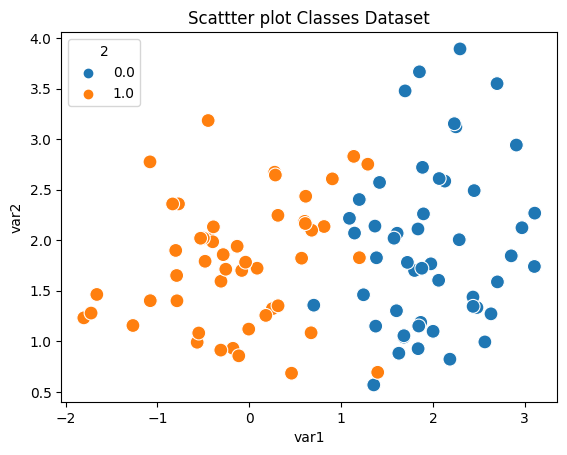

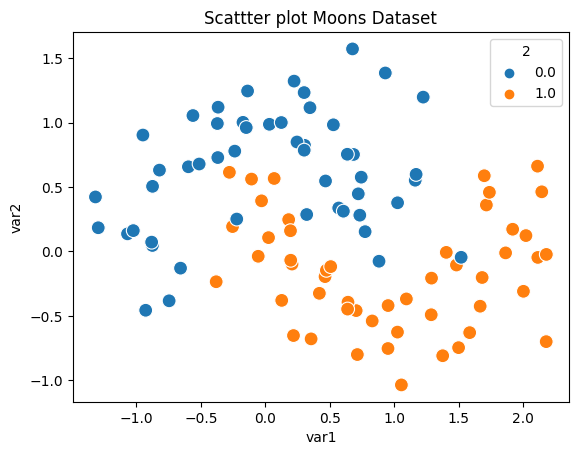

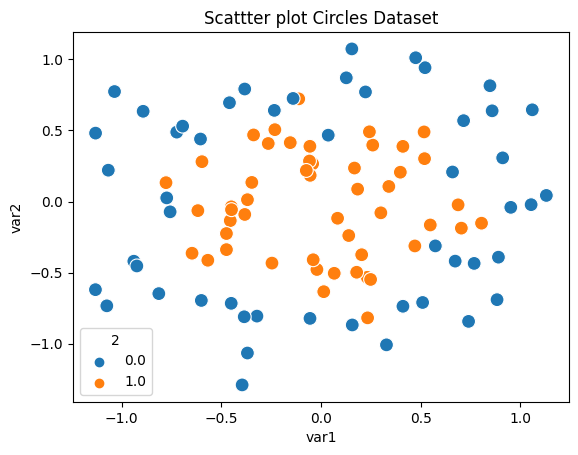

In [5]:
#Plotting the syntetic initial datasets, with an increasing complexity
scatter_data(classes, var1='var1', var2='var2', datasetName='Classes')
scatter_data(moons, var1='var1', var2='var2', datasetName='Moons')
scatter_data(circles, var1='var1', var2='var2', datasetName='Circles')

## Experiments

In [6]:
# fixing the MLP architecture
model = [2,4,4,1]

### MLP + Evolutionary Strategy

iter 10. reward: 0.877146
iter 20. reward: 1.699242
iter 30. reward: 1.030498
iter 40. reward: 3.713310
iter 50. reward: 5.270196
iter 60. reward: 11.754083
iter 70. reward: 5.507716
iter 80. reward: 3.608891
iter 90. reward: 6.292486
iter 100. reward: 22.936817


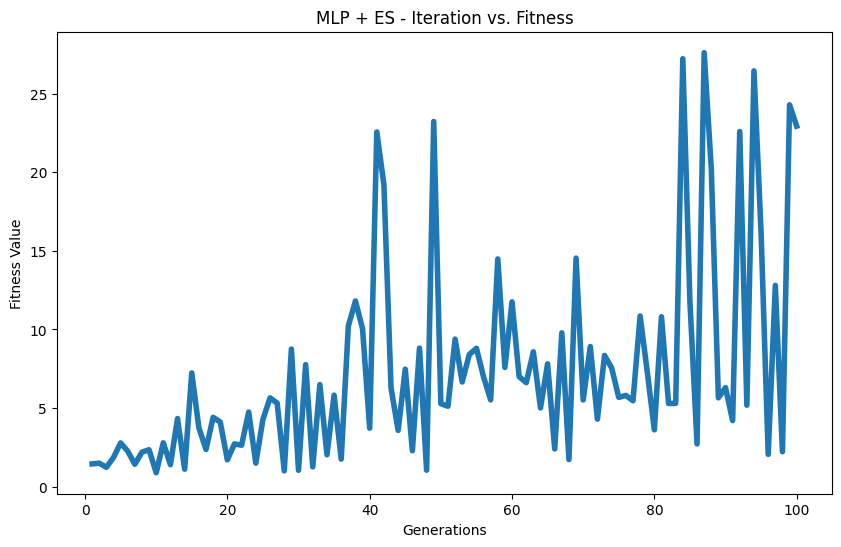

Train loss: 7.688235759735107         Train acc:  0.9714285714285714
Validation loss: 7.726778984069824    Validation acc:  0.9333333333333333
313/313 [==============================] - 0s 1ms/step


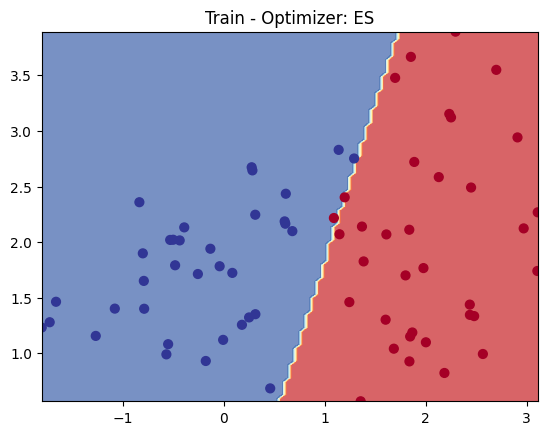

313/313 [==============================] - 0s 1ms/step


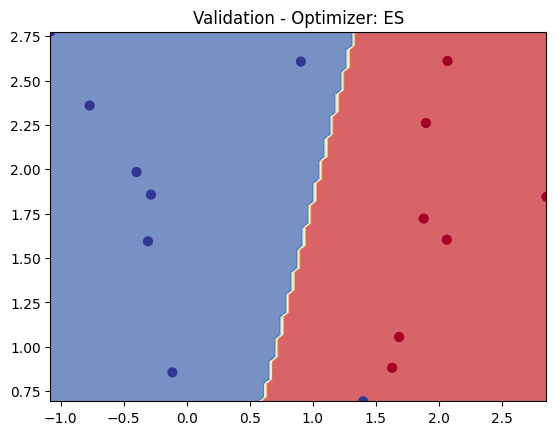

313/313 [==============================] - 0s 1ms/step


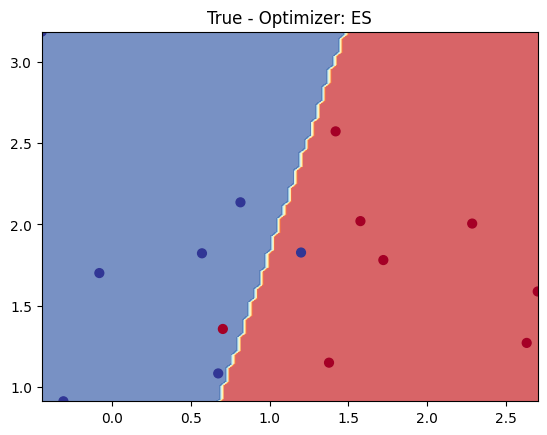

(0.8666666666666667, 7.655371)

In [7]:
# Classes Dataset
es = GAESMLP(model, 'ES', pop_size=40,sigma=0.2,learning_rate=0.3,decay=0.995,num_threads=1, save_dir='results/es_classes')
es.fit(df_classes['X_train'], df_classes['y_train'], X_val=df_classes['X_val'], y_val=df_classes['y_val'], X_test=df_classes['X_test'], y_test=df_classes['y_test'], verbose=True)
es.evaluate(df_classes['X_test'], df_classes['y_test'], verbose='Test')

iter 10. reward: 2.260737
iter 20. reward: 2.284691
iter 30. reward: 2.619517
iter 40. reward: 2.014701
iter 50. reward: 2.834151
iter 60. reward: 2.878143
iter 70. reward: 2.727867
iter 80. reward: 2.719084
iter 90. reward: 3.100185
iter 100. reward: 2.996120
iter 110. reward: 3.414736
iter 120. reward: 3.635818
iter 130. reward: 3.801899
iter 140. reward: 4.145136
iter 150. reward: 4.285208


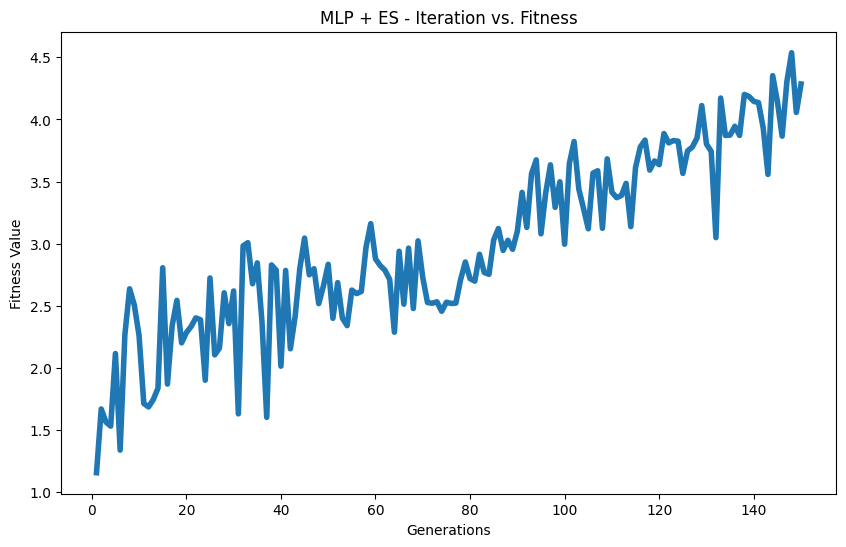

Train loss: 7.688235759735107         Train acc:  0.8857142857142857
Validation loss: 7.726780414581299    Validation acc:  0.8
313/313 [==============================] - 0s 2ms/step


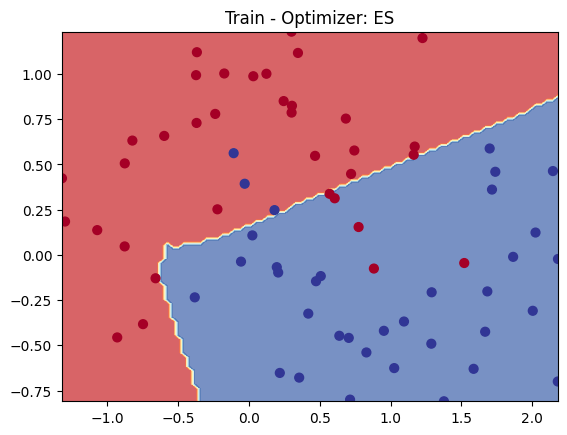

313/313 [==============================] - 1s 2ms/step


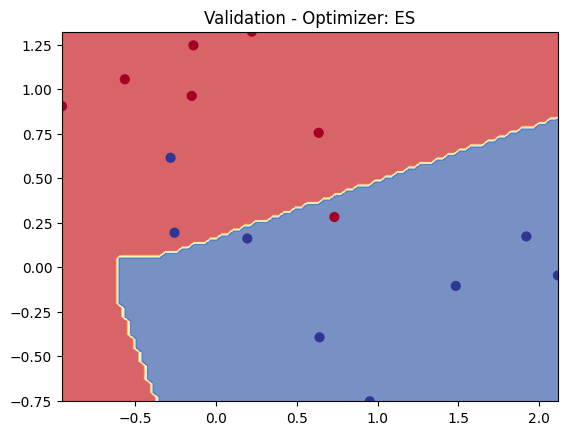

313/313 [==============================] - 1s 2ms/step


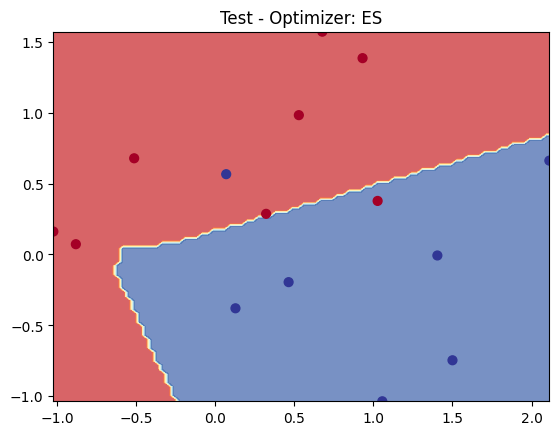

(0.8666666666666667, 7.655371)

In [29]:
# Moons datset
es = GAESMLP(model, 'ES',pop_size=40,sigma=0.2,learning_rate=0.3,decay=0.995,num_threads=1, save_dir='results/es_moons')
es.fit(df_moons['X_train'], df_moons['y_train'], X_val = df_moons['X_val'], y_val = df_moons['y_val'], X_test=df_moons['X_test'], y_test=df_moons['y_test'], verbose=True, iterations=150)
es.evaluate(df_moons['X_test'], df_moons['y_test'], verbose='Test')

iter 10. reward: 1.165971
iter 20. reward: 1.424354
iter 30. reward: 1.301088
iter 40. reward: 1.520580
iter 50. reward: 1.445839
iter 60. reward: 1.702989
iter 70. reward: 1.858198
iter 80. reward: 1.993535
iter 90. reward: 1.869038
iter 100. reward: 1.946209
iter 110. reward: 2.042791
iter 120. reward: 2.232308
iter 130. reward: 2.258050
iter 140. reward: 2.292251
iter 150. reward: 2.816016
iter 160. reward: 3.088067
iter 170. reward: 4.737058
iter 180. reward: 4.471834
iter 190. reward: 5.477920
iter 200. reward: 4.906909


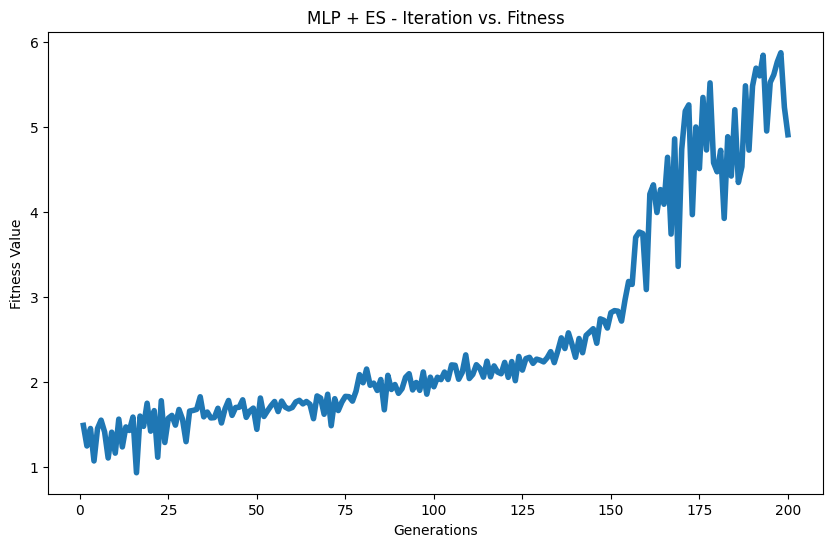

Train loss: 7.685616493225098         Train acc:  0.9142857142857143
Validation loss: 7.785959720611572    Validation acc:  0.8666666666666667
313/313 [==============================] - 0s 1ms/step


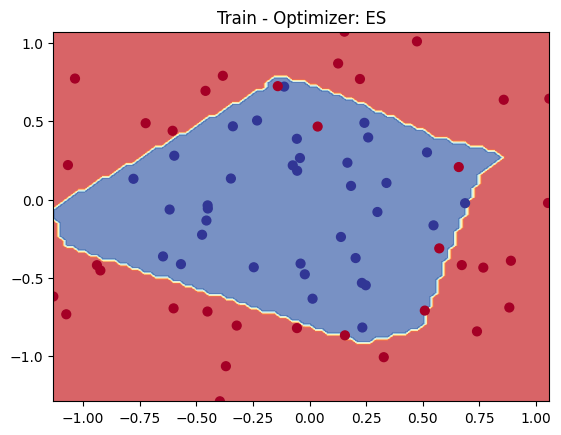

313/313 [==============================] - 0s 2ms/step


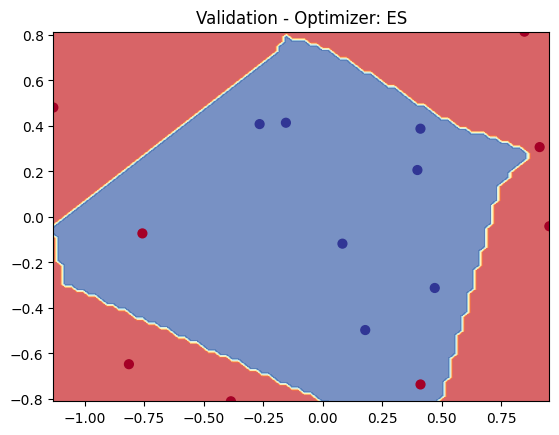

313/313 [==============================] - 0s 1ms/step


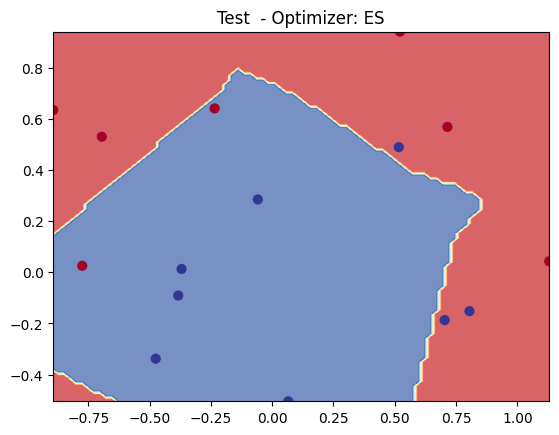

(0.6666666666666666, 7.7267804)

In [28]:
# Circles dataset
es = GAESMLP(model, 'ES',pop_size=40,sigma=0.2,learning_rate=0.3,decay=0.995,num_threads=1, save_dir='results/es_circles')
es.fit(df_circles['X_train'], df_circles['y_train'], X_val = df_circles['X_val'], y_val = df_circles['y_val'], X_test=df_circles['X_test'], y_test=df_circles['y_test'], verbose=True, iterations=200)
es.evaluate(df_circles['X_test'], df_circles['y_test'], verbose = 'Test ')

### MLP + Genetic Algorithm

Generation = 1
Fitness    = 1.7428767524083897
Generation = 2
Fitness    = 2.30064911068036
Generation = 3
Fitness    = 2.30064911068036
Generation = 4
Fitness    = 2.30064911068036
Generation = 5
Fitness    = 2.30064911068036
Generation = 6
Fitness    = 3.0574382592100986
Generation = 7
Fitness    = 3.0574382592100986
Generation = 8
Fitness    = 3.5229102575392894
Generation = 9
Fitness    = 3.6109448716898798
Generation = 10
Fitness    = 3.6109448716898798
Generation = 11
Fitness    = 4.149558873276912
Generation = 12
Fitness    = 4.1712726644365405
Generation = 13
Fitness    = 4.1712726644365405
Generation = 14
Fitness    = 5.055938007091651
Generation = 15
Fitness    = 5.847561908291805
Generation = 16
Fitness    = 6.192226344293934
Generation = 17
Fitness    = 7.227193745276277
Generation = 18
Fitness    = 7.272761265394466
Generation = 19
Fitness    = 7.726518148452695
Generation = 20
Fitness    = 7.726518148452695
Generation = 21
Fitness    = 7.726518148452695
Generation = 22
Fi

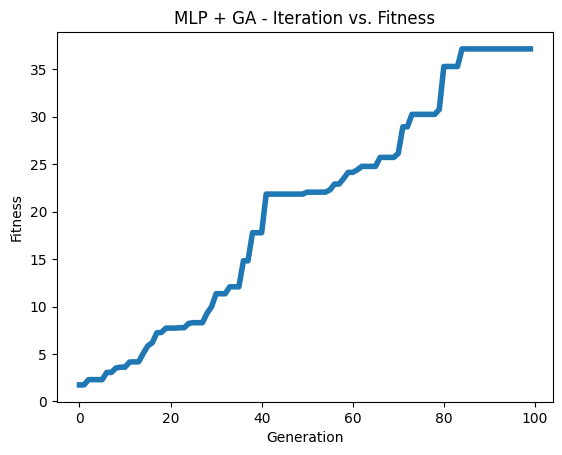

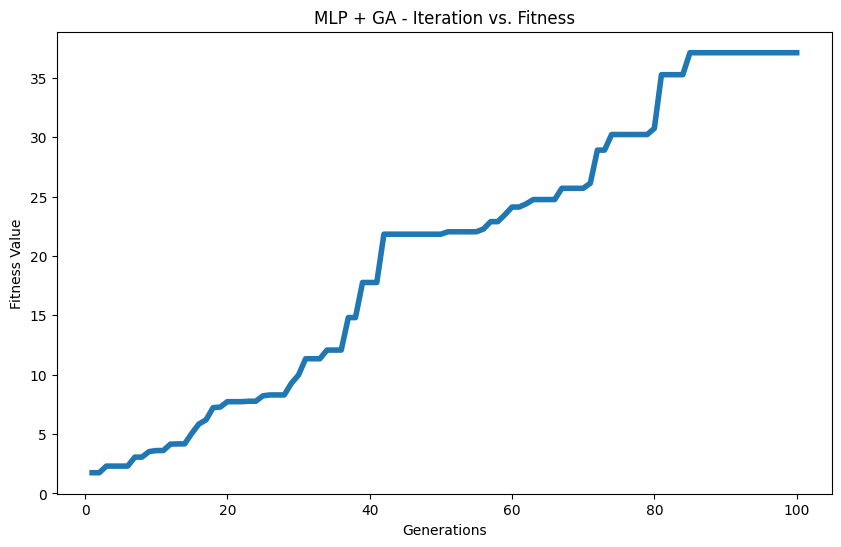

Train loss: 7.690201282501221         Train acc:  0.9857142857142858
Validation loss: 7.726778984069824    Validation acc:  0.9333333333333333
313/313 [==============================] - 0s 1ms/step


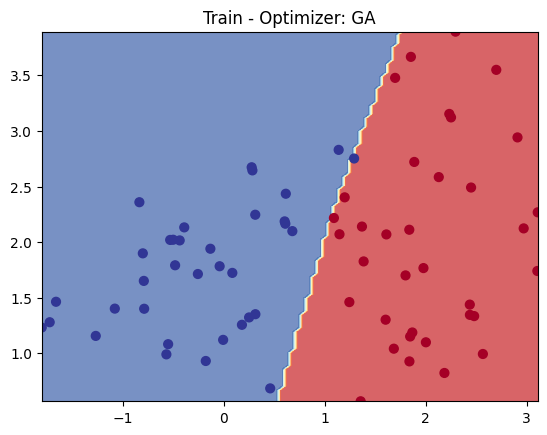

313/313 [==============================] - 1s 2ms/step


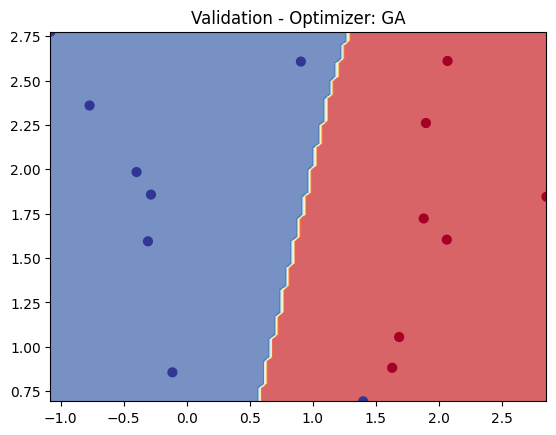

(0.8666666666666667, 7.655371)

In [11]:
# Classes dataset
ga = GAESMLP(model, 'GA', num_solutions=10, num_parents_mating=5, save_dir='results/ga_classes')
ga.fit(df_classes['X_train'], df_classes['y_train'], X_val=df_classes['X_val'], y_val=df_classes['y_val'], X_test=df_classes['X_test'], y_test=df_classes['y_test'], verbose=True)
ga.evaluate(df_classes['X_test'], df_classes['y_test'])

Generation = 1
Fitness    = 1.5657949494175682
Generation = 2
Fitness    = 1.5657949494175682
Generation = 3
Fitness    = 1.5657949494175682
Generation = 4
Fitness    = 1.568900002382941
Generation = 5
Fitness    = 1.6498871511362427
Generation = 6
Fitness    = 1.675997808135755
Generation = 7
Fitness    = 1.675997808135755
Generation = 8
Fitness    = 1.7772361300488826
Generation = 9
Fitness    = 1.8303744307402645
Generation = 10
Fitness    = 1.848356886156051
Generation = 11
Fitness    = 1.848356886156051
Generation = 12
Fitness    = 1.848356886156051
Generation = 13
Fitness    = 1.8818544080419914
Generation = 14
Fitness    = 1.9129030509217801
Generation = 15
Fitness    = 1.9193885124386882
Generation = 16
Fitness    = 1.9806557303694958
Generation = 17
Fitness    = 1.9806557303694958
Generation = 18
Fitness    = 2.0611369381285534
Generation = 19
Fitness    = 2.0760598372837658
Generation = 20
Fitness    = 2.3338439905014248
Generation = 21
Fitness    = 2.3338439905014248
Generat

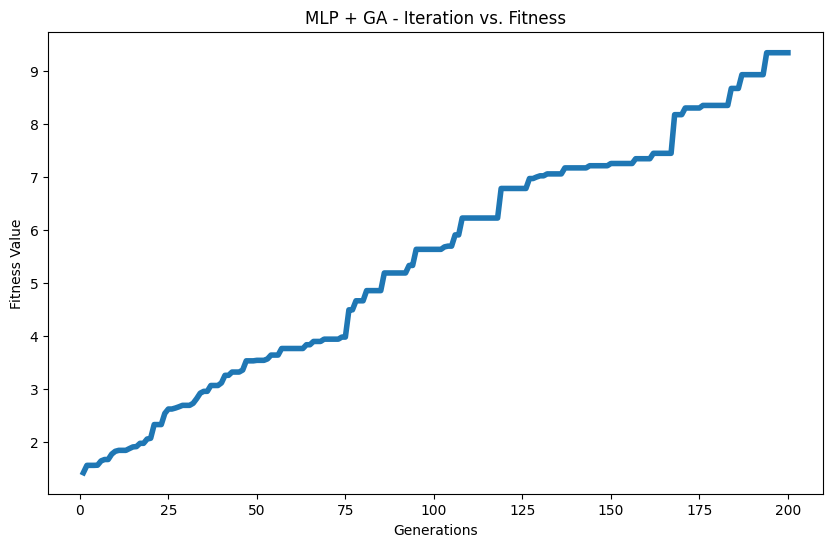

Train loss: 7.6888909339904785         Train acc:  0.9571428571428572
Validation loss: 7.726778984069824    Validation acc:  0.9333333333333333
313/313 [==============================] - 0s 2ms/step


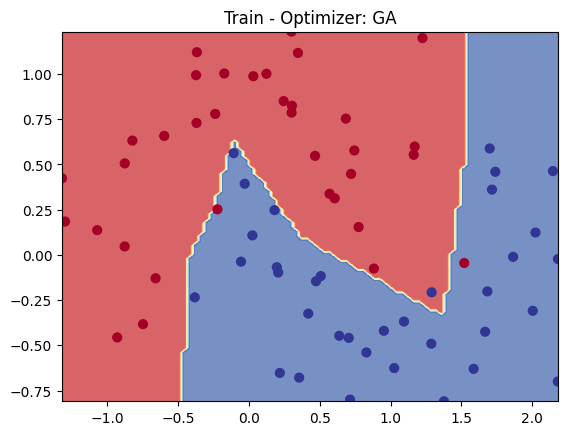

313/313 [==============================] - 1s 2ms/step


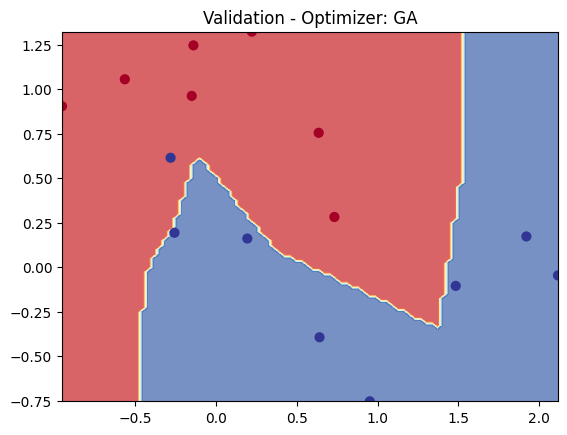

313/313 [==============================] - 1s 2ms/step


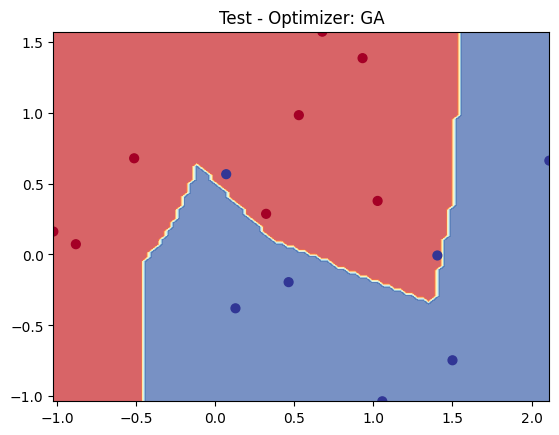

(0.8666666666666667, 7.5247817)

In [27]:
# Moons dataset
ga = GAESMLP(model, 'GA', num_solutions=10, num_parents_mating=5, save_dir='results/ga_moons')
ga.fit(df_moons['X_train'], df_moons['y_train'], X_val = df_moons['X_val'], y_val = df_moons['y_val'], X_test=df_moons['X_test'], y_test=df_moons['y_test'], verbose=True, iterations=200)
ga.evaluate(df_moons['X_test'], df_moons['y_test'], 'Test')

Generation = 1
Fitness    = 1.4878000325976788
Generation = 2
Fitness    = 1.4987676663547298
Generation = 3
Fitness    = 1.4987676663547298
Generation = 4
Fitness    = 1.4987676663547298
Generation = 5
Fitness    = 1.4987676663547298
Generation = 6
Fitness    = 1.4987676663547298
Generation = 7
Fitness    = 1.4987676663547298
Generation = 8
Fitness    = 1.510182121160063
Generation = 9
Fitness    = 1.5161856402633305
Generation = 10
Fitness    = 1.5161856402633305
Generation = 11
Fitness    = 1.5161856402633305
Generation = 12
Fitness    = 1.5161856402633305
Generation = 13
Fitness    = 1.5161856402633305
Generation = 14
Fitness    = 1.5164565777711858
Generation = 15
Fitness    = 1.521904847079579
Generation = 16
Fitness    = 1.521904847079579
Generation = 17
Fitness    = 1.5257680460442444
Generation = 18
Fitness    = 1.5364955112066319
Generation = 19
Fitness    = 1.5364955112066319
Generation = 20
Fitness    = 1.5364955112066319
Generation = 21
Fitness    = 1.5364955112066319
Gene

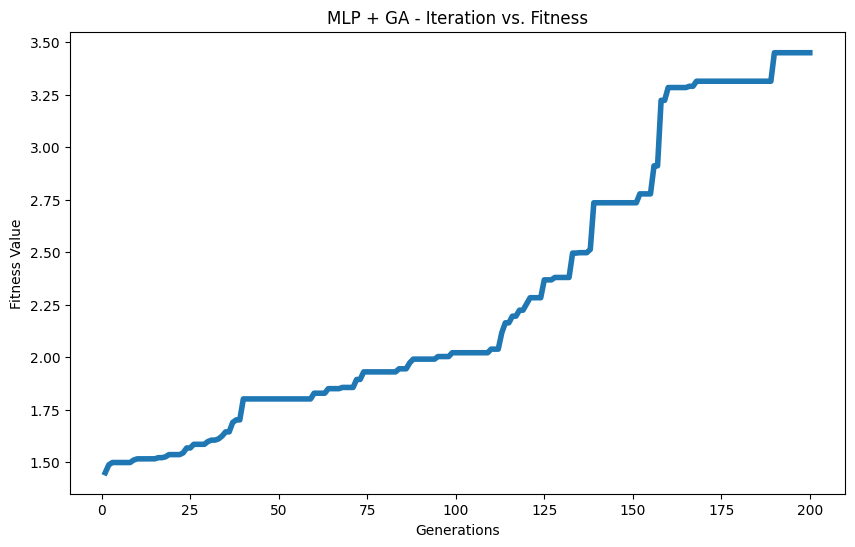

Train loss: 7.686271667480469         Train acc:  0.8714285714285714
Validation loss: 7.785959720611572    Validation acc:  0.8666666666666667
313/313 [==============================] - 0s 1ms/step


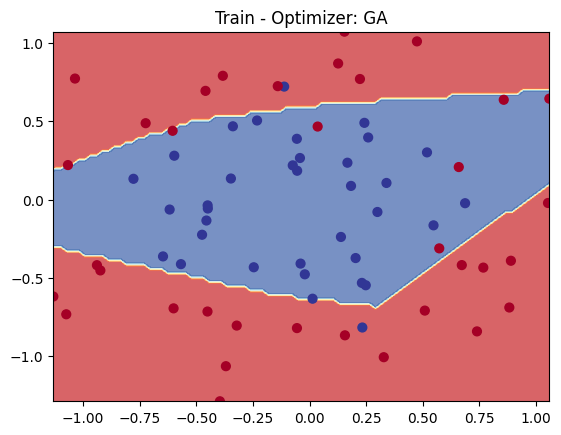

313/313 [==============================] - 0s 1ms/step


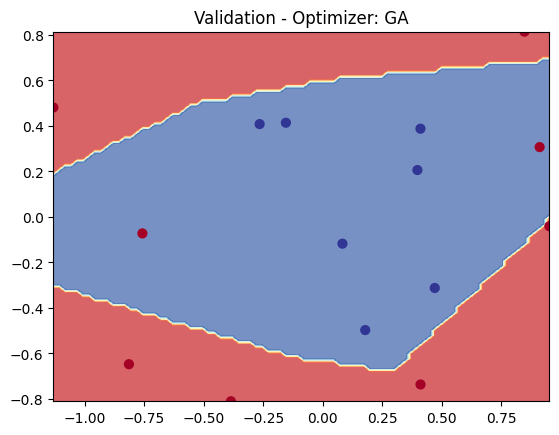

313/313 [==============================] - 0s 1ms/step


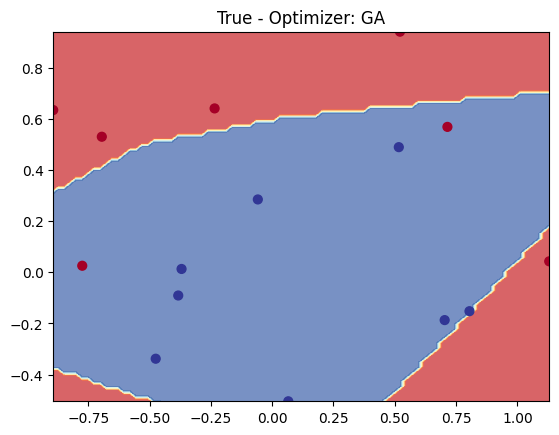

(0.8666666666666667, 7.512553)

In [26]:
# Circles dataset
ga = GAESMLP(model, 'GA', num_solutions=10, num_parents_mating=5, save_dir='results/ga_circles')
ga.fit(df_circles['X_train'], df_circles['y_train'], X_val = df_circles['X_val'], y_val = df_circles['y_val'], X_test=df_circles['X_test'], y_test=df_circles['y_test'], verbose=True, iterations=300)
ga.evaluate(df_circles['X_test'], df_circles['y_test'], verbose=True)

### MLP + Backpropagation

Epoch 1/100
3/3 [==============================] - 1s 7ms/step - loss: 0.8054 - accuracy: 0.4000
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 0.7958 - accuracy: 0.4000
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 0.7880 - accuracy: 0.4000
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7762 - accuracy: 0.4000
Epoch 5/100
3/3 [==============================] - 0s 3ms/step - loss: 0.7662 - accuracy: 0.3857
Epoch 6/100
3/3 [==============================] - 0s 3ms/step - loss: 0.7576 - accuracy: 0.3857
Epoch 7/100
3/3 [==============================] - 0s 3ms/step - loss: 0.7490 - accuracy: 0.3714
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7409 - accuracy: 0.3714
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7334 - accuracy: 0.3571
Epoch 10/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7264 - accuracy: 0.4286
Epoch 11/100
3/3 [===========

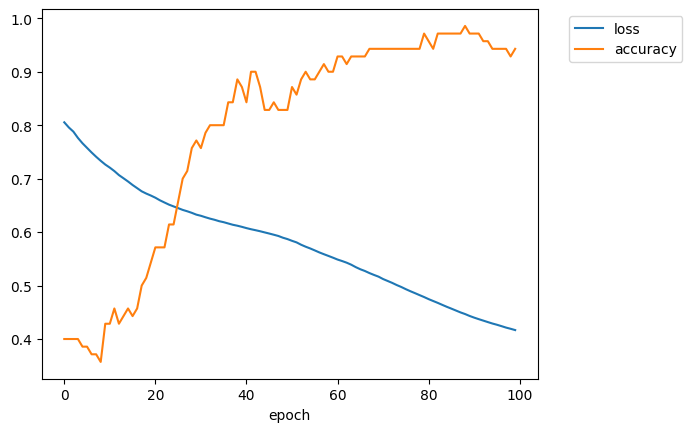

Train loss: 7.688235759735107         Train acc:  0.9428571428571428
Validation loss: 7.726778984069824    Validation acc:  0.9333333333333333
313/313 [==============================] - 1s 2ms/step


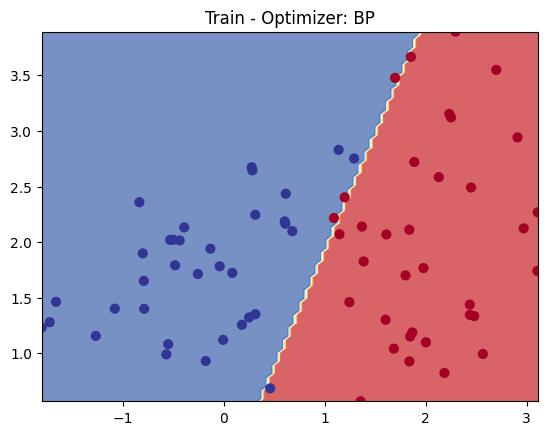

313/313 [==============================] - 1s 2ms/step


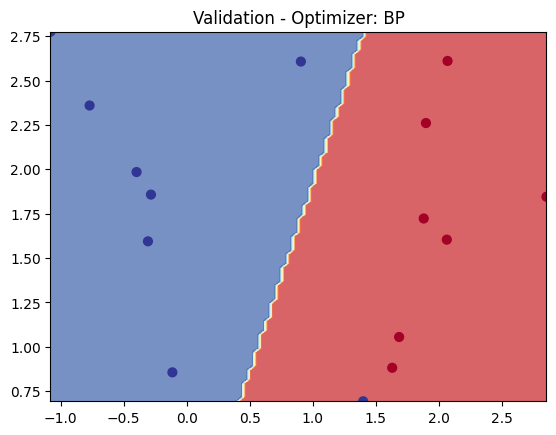

313/313 [==============================] - 1s 2ms/step


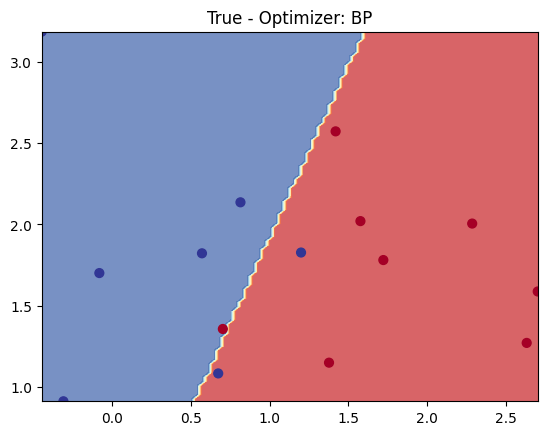

(0.8, 7.590077)

In [15]:
# Classes dataset
bp = GAESMLP(model, 'BP', learning_rate=0.5, momentum=0.9, nesterov=True, save_dir='results/bp_classes')
bp.fit(df_classes['X_train'], df_classes['y_train'], X_val=df_classes['X_val'], y_val=df_classes['y_val'], X_test=df_classes['X_test'], y_test=df_classes['y_test'], verbose=True)
bp.evaluate(df_classes['X_test'], df_classes['y_test'], verbose=True)

Epoch 1/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.7122 - accuracy: 0.2714
Epoch 2/2000
3/3 [==============================] - 0s 2ms/step - loss: 0.7113 - accuracy: 0.3143
Epoch 3/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.7105 - accuracy: 0.3286
Epoch 4/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.7095 - accuracy: 0.3143
Epoch 5/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.7088 - accuracy: 0.3286
Epoch 6/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.7082 - accuracy: 0.3571
Epoch 7/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.7076 - accuracy: 0.3429
Epoch 8/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.7069 - accuracy: 0.3429
Epoch 9/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.7063 - accuracy: 0.3143
Epoch 10/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.7058 - accuracy: 0.3429
Epoch 11/2000
3/3 [

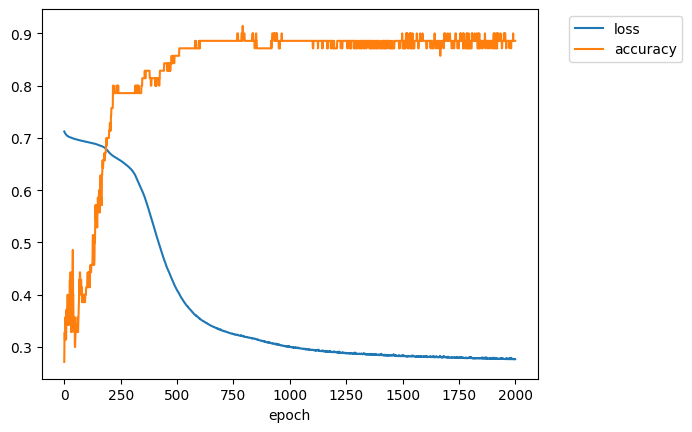

Train loss: 7.689546585083008         Train acc:  0.8857142857142857
Validation loss: 7.726780414581299    Validation acc:  0.8
313/313 [==============================] - 0s 1ms/step


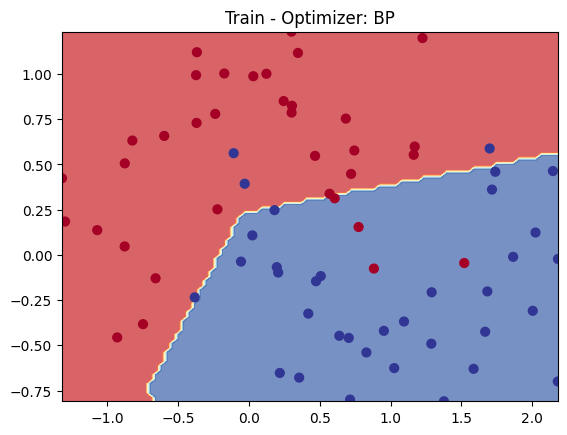

313/313 [==============================] - 0s 1ms/step


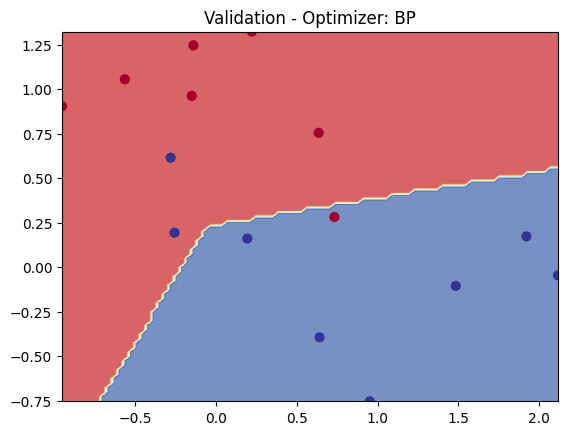

313/313 [==============================] - 0s 1ms/step


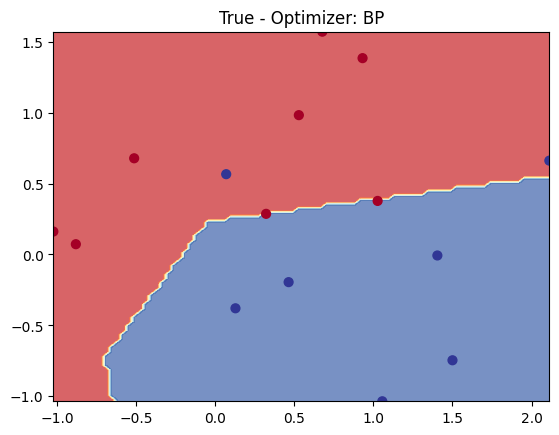

(0.7333333333333333, 7.655371)

In [24]:
# Moons dataset
bp = GAESMLP(model, 'BP', learning_rate=0.5, momentum=0.9, nesterov=True, save_dir='results/bp_moons')
bp.fit(df_moons['X_train'], df_moons['y_train'], X_val = df_moons['X_val'], y_val = df_moons['y_val'], X_test=df_moons['X_test'], y_test=df_moons['y_test'], verbose=True, iterations=2000)
bp.evaluate(df_moons['X_test'], df_moons['y_test'], verbose=True)

Epoch 1/3000
3/3 [==============================] - 0s 4ms/step - loss: 0.6911 - accuracy: 0.5571
Epoch 2/3000
3/3 [==============================] - 0s 4ms/step - loss: 0.6909 - accuracy: 0.5571
Epoch 3/3000
3/3 [==============================] - 0s 7ms/step - loss: 0.6906 - accuracy: 0.5000
Epoch 4/3000
3/3 [==============================] - 0s 0s/step - loss: 0.6906 - accuracy: 0.4857
Epoch 5/3000
3/3 [==============================] - 0s 6ms/step - loss: 0.6904 - accuracy: 0.5000
Epoch 6/3000
3/3 [==============================] - 0s 4ms/step - loss: 0.6903 - accuracy: 0.5000
Epoch 7/3000
3/3 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.5571
Epoch 8/3000
3/3 [==============================] - 0s 4ms/step - loss: 0.6903 - accuracy: 0.4857
Epoch 9/3000
3/3 [==============================] - 0s 4ms/step - loss: 0.6904 - accuracy: 0.5571
Epoch 10/3000
3/3 [==============================] - 0s 4ms/step - loss: 0.6902 - accuracy: 0.5571
Epoch 11/3000
3/3 [=

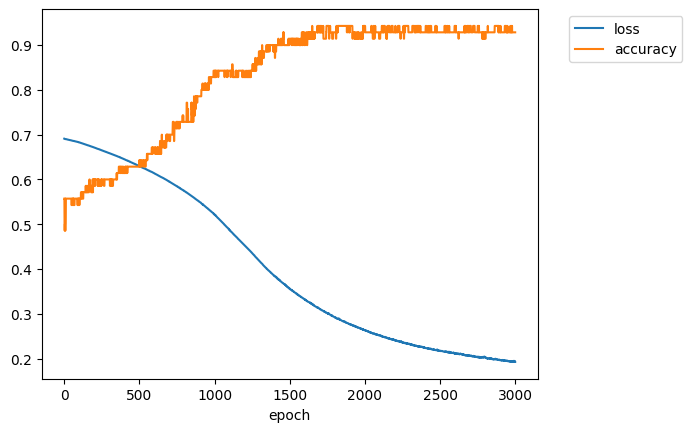

Train loss: 7.688891410827637         Train acc:  0.9285714285714286
Validation loss: 7.720666408538818    Validation acc:  0.9333333333333333
313/313 [==============================] - 0s 1ms/step


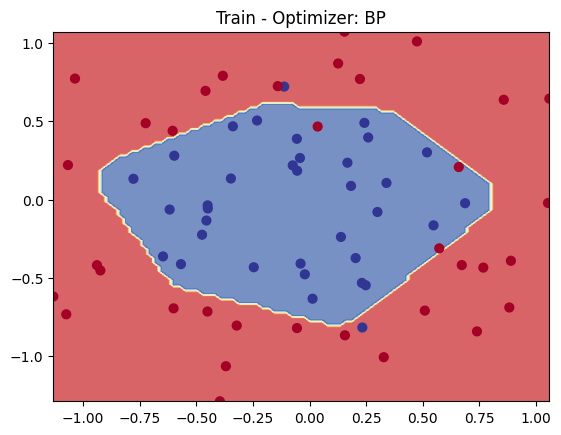

313/313 [==============================] - 0s 1ms/step


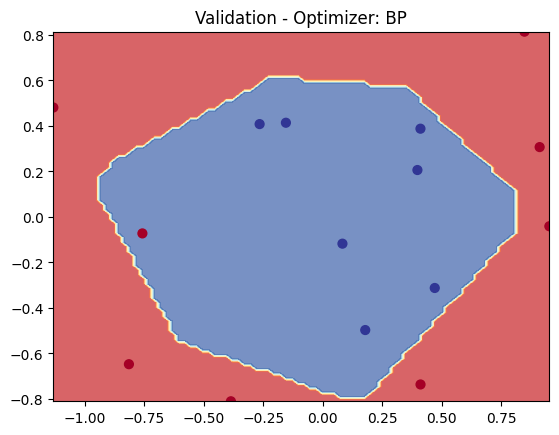

313/313 [==============================] - 0s 1ms/step


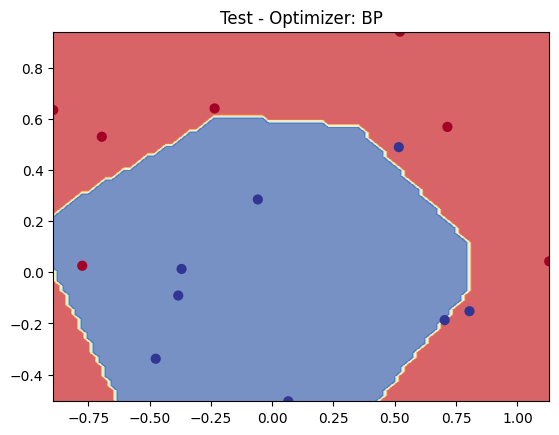

(0.7333333333333333, 7.798188)

In [21]:
# Circles dataset
bp = GAESMLP(model, 'BP', learning_rate=0.5, momentum=0.9, nesterov=True, save_dir='results/bp_circles')
bp.fit(df_circles['X_train'], df_circles['y_train'], X_val = df_circles['X_val'], y_val = df_circles['y_val'], X_test=df_circles['X_test'], y_test=df_circles['y_test'], verbose=True, iterations = 3000)
bp.evaluate(df_circles['X_test'], df_circles['y_test'], verbose = 'Test')